Am I performing as expected to reach my target date?
By how many days am I over or under achiving?

In [1]:
import pyodbc 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from random import randrange
import datetime 
from datetime import timedelta

plt.style.use('fivethirtyeight')
%matplotlib inline

server = 'devenviroment.database.windows.net'
database = 'DemoDB'
username = 'ashraf'
password = 'xxxxxx
driver= '{ODBC Driver 17 for SQL Server}'

cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

Connecting to Azure DB

In [2]:
task_df = pd.read_sql_query("SELECT * FROM [dbo].[Tasks]", cnxn)
task_df.head()

,project_id,task_id,parent_task_id,parent_task_name,project_name,task_actual_cost,task_actual_duration,task_actual_finish_date,task_actual_fixed_cost,task_actual_overtime_cost,...,task_remaining_cost,task_remaining_duration,task_remaining_overtime_cost,task_remaining_overtime_work,task_remaining_regular_cost,task_remaining_regular_work,task_remaining_work,task_start_date,task_start_date_string,task_work
0,c3ec3f4b-7254-e711-80d7-00155d38270c,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,0d88c9f1-1a02-ea11-81ff-000d3a6dccdb,Cactus Traffic Sensor,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,NaT,1899-12-30 00:00:00,0,...,44200.0,520.0,0,0,44200.0,680.0,1901-11-10 00:00:00,2020-01-13 08:00:00,None,680.0
1,c3ec3f4b-7254-e711-80d7-00155d38270c,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,Phase 1 - Strategic Plan,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,NaT,1899-12-30 00:00:00,0,...,8320.0,80.0,0,0,8320.0,128.0,1900-05-07 00:00:00,2020-01-13 08:00:00,None,128.0
2,c3ec3f4b-7254-e711-80d7-00155d38270c,1188c9f1-1a02-ea11-81ff-000d3a6dccdb,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,Assessment,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,NaT,1899-12-30 00:00:00,0,...,2080.0,32.0,0,0,2080.0,32.0,1900-02-01 00:00:00,2020-01-13 08:00:00,None,32.0
3,c3ec3f4b-7254-e711-80d7-00155d38270c,1288c9f1-1a02-ea11-81ff-000d3a6dccdb,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,Assessment,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,NaT,1899-12-30 00:00:00,0,...,6240.0,48.0,0,0,6240.0,96.0,1900-04-05 00:00:00,2020-01-17 08:00:00,None,96.0
4,c3ec3f4b-7254-e711-80d7-00155d38270c,1488c9f1-1a02-ea11-81ff-000d3a6dccdb,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,Phase 1 - Strategic Plan,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,NaT,1899-12-30 00:00:00,0,...,7800.0,88.0,0,0,7800.0,120.0,1900-04-29 00:00:00,2020-01-27 08:00:00,None,120.0


# Clean the dataset

Find null values and either replace or remove based on the number of values which are Null/Empty

In [3]:
task_df.isnull().sum()

project_id                         0
task_id                            0
parent_task_id                     0
parent_task_name                   0
project_name                       0
task_actual_cost                   0
task_actual_duration               0
task_actual_finish_date         4244
task_actual_fixed_cost             0
task_actual_overtime_cost          0
task_actual_overtime_work          0
task_actual_regular_cost           0
task_actual_regular_work           0
task_actual_start_date          4079
task_actual_work                   0
task_cost                          0
task_cost_variance                 0
task_created_date                  0
task_deadline                   4962
task_duration                      0
task_duration_is_estimated         0
task_duration_string            4989
task_duration_variance             0
task_early_finish                209
task_early_start                 209
task_finish_date                 209
task_fixed_cost                    0
t

Columns which have over 4 thousand null values are obsolete, because the machine learning model cannot handle empty variables 

In [4]:
task_df.drop(["task_actual_finish_date", "task_actual_start_date", "task_deadline", "task_duration_string", "task_start_date_string"]
              , axis=1, inplace=True)

Identifying null values and replacing them with random dates between 2000 and 2019 for variety (not best practice but i needed more data to work with)

In [5]:
def GetDatesBetween(row):
    
    if row == False:
        start = datetime.datetime(2000, 1, 1)
        end = datetime.datetime(2019, 12, 1)

        delta = end - start
        int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
        random_second = randrange(int_delta)
        return np.datetime64((start + timedelta(seconds=random_second)).strftime('%Y-%m-%d'))
    
    else:
        return row

In [6]:
task_df["task_start_date"] = [GetDatesBetween(i) for i in task_df["task_start_date"].isnull()] 

As for the finish date, I am keeping this consistent, as I've already created random dates i do not need to apply the same process to the finsha date

In [7]:
task_df[task_df["task_finish_date"].isnull()] = datetime.datetime(2030, 1, 1)

In [8]:
task_df.dtypes

project_id                              object
task_id                                 object
parent_task_id                          object
parent_task_name                        object
project_name                            object
task_actual_cost                        object
task_actual_duration                    object
task_actual_fixed_cost                  object
task_actual_overtime_cost               object
task_actual_overtime_work               object
task_actual_regular_cost                object
task_actual_regular_work                object
task_actual_work                        object
task_cost                               object
task_cost_variance                      object
task_created_date                       object
task_duration                           object
task_duration_is_estimated              object
task_duration_variance                  object
task_early_finish               datetime64[ns]
task_early_start                datetime64[ns]
task_finish_d

From the code above we can see that the numerical data is considered an object and so is the start date.
So the code below uses the "apply()" function to convert each value to numerical data (or date time)

Another option is to use the ".astype(float)" for simplicity but i found that it replaces non numerical vlaues as NaN which i do now want.

In [9]:
def isFloat(x):
    try:
        float(x)
        return True
    except:
        return False

task_df["task_start_date"] = task_df["task_start_date"].apply(lambda x: pd.to_datetime(str(x), errors='coerce')) 
task_df["task_actual_duration"] = task_df["task_actual_duration"].apply(lambda x: float(x) if isFloat(x) else 0)
task_df["task_actual_work"] = task_df["task_actual_work"].apply(lambda x: float(x) if isFloat(x) else 0)
task_df["task_cost"] = task_df["task_cost"].apply(lambda x: float(x) if isFloat(x) else 0)
task_df["task_percent_completed"] = task_df["task_percent_completed"].apply(lambda x: float(x) if isFloat(x) else 0)
task_df["task_percent_work_completed"] = task_df["task_percent_work_completed"].apply(lambda x: float(x) if isFloat(x) else 0)
task_df["task_work"] = task_df["task_work"].apply(lambda x: float(x) if isFloat(x) else 0)
task_df["task_regular_work"] = task_df["task_regular_work"].apply(lambda x: float(x) if isFloat(x) else 0)     

In [10]:
task_df.dtypes

project_id                              object
task_id                                 object
parent_task_id                          object
parent_task_name                        object
project_name                            object
task_actual_cost                        object
task_actual_duration                   float64
task_actual_fixed_cost                  object
task_actual_overtime_cost               object
task_actual_overtime_work               object
task_actual_regular_cost                object
task_actual_regular_work                object
task_actual_work                       float64
task_cost                              float64
task_cost_variance                      object
task_created_date                       object
task_duration                           object
task_duration_is_estimated              object
task_duration_variance                  object
task_early_finish               datetime64[ns]
task_early_start                datetime64[ns]
task_finish_d

Machine learning models cannot handle datetime values so a different a approach is required. 
Instead of using the task start and finish dates as features, I have created a columns called "total days" which is a numerical value.

I wanted to also apply the Task_cost as part of my independant variable but the value was too correlated with Task_work. For example "as the task cost increases so does the Task_work" this will cause the root mean squared error to be 0.99 which is the result of a data leak and/or overfitting (see graph below)

To workaround this i will instead use the average cost of each task. 

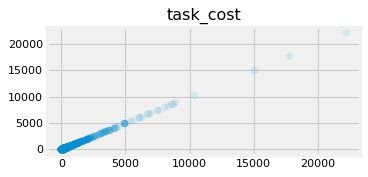

In [11]:
a = ["task_cost"]
b = ["task_work"]

plt.figure(num=None, figsize=(18, 50), dpi=80, facecolor='w', edgecolor='k')

for idx, variable in enumerate(a):
    ax = plt.subplot(16, 3, idx+1)
    ax.set_title(variable)
    ax.scatter(task_df[b],task_df["task_work"].tolist(),alpha=0.1)
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [12]:
task_df["total_days"] = (task_df["task_finish_date"].dt.date - task_df["task_start_date"].dt.date).astype('timedelta64[D]')
task_df["average_cost"] = task_df["task_cost"] // task_df["total_days"]
task_df[task_df["average_cost"].isnull()] = task_df["average_cost"].mean() 

In [13]:
task_df.head()

,project_id,task_id,parent_task_id,parent_task_name,project_name,task_actual_cost,task_actual_duration,task_actual_fixed_cost,task_actual_overtime_cost,task_actual_overtime_work,...,task_remaining_duration,task_remaining_overtime_cost,task_remaining_overtime_work,task_remaining_regular_cost,task_remaining_regular_work,task_remaining_work,task_start_date,task_work,total_days,average_cost
0,c3ec3f4b-7254-e711-80d7-00155d38270c,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,0d88c9f1-1a02-ea11-81ff-000d3a6dccdb,Cactus Traffic Sensor,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,520,0,0,44200,680,1901-11-10 00:00:00,2011-09-26 00:00:00,680.0,3119.0,14.0
1,c3ec3f4b-7254-e711-80d7-00155d38270c,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,Phase 1 - Strategic Plan,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,80,0,0,8320,128,1900-05-07 00:00:00,2007-07-02 00:00:00,128.0,4589.0,1.0
2,c3ec3f4b-7254-e711-80d7-00155d38270c,1188c9f1-1a02-ea11-81ff-000d3a6dccdb,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,Assessment,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,32,0,0,2080,32,1900-02-01 00:00:00,2006-02-28 00:00:00,32.0,5070.0,0.0
3,c3ec3f4b-7254-e711-80d7-00155d38270c,1288c9f1-1a02-ea11-81ff-000d3a6dccdb,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,Assessment,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,48,0,0,6240,96,1900-04-05 00:00:00,2003-10-31 00:00:00,96.0,5929.0,1.0
4,c3ec3f4b-7254-e711-80d7-00155d38270c,1488c9f1-1a02-ea11-81ff-000d3a6dccdb,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,Phase 1 - Strategic Plan,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,88,0,0,7800,120,1900-04-29 00:00:00,2019-10-18 00:00:00,120.0,115.0,67.0


In [14]:
task_df.describe()

,task_actual_duration,task_actual_work,task_cost,task_percent_completed,task_percent_work_completed,task_regular_work,task_work,total_days,average_cost
count,4989.000000,4989.000000,4.989000e+03,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,28.311581,32.348504,1.221005e+04,16.476756,16.356090,184.303372,184.303372,3664.542701,4.528870
std,150.408731,227.956038,4.984518e+04,36.057730,36.002013,749.637061,749.637061,2215.983558,120.706317
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-238.000000,-7340.000000
25%,0.000000,0.000000,5.200000e+02,0.000000,0.000000,8.000000,8.000000,1741.000000,0.000000
50%,0.000000,0.000000,2.080000e+03,0.000000,0.000000,32.000000,32.000000,3679.000000,0.000000
75%,0.000000,0.000000,7.200000e+03,0.000000,0.000000,108.000000,108.000000,5563.000000,3.000000
max,1997.241667,5704.000000,1.442275e+06,100.000000,100.000000,22188.848333,22188.848333,8255.000000,2888.000000


 Investigate and analyze data, finding the appropriate features to predict task_work

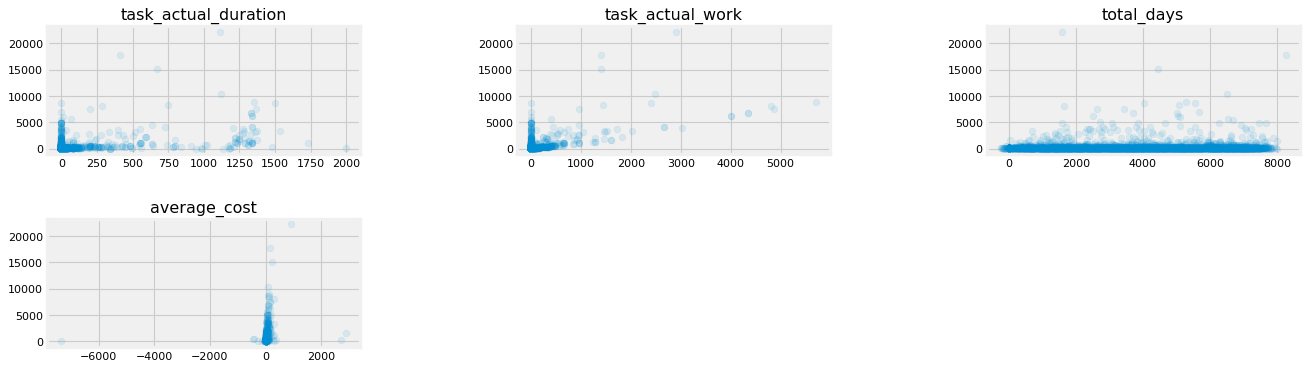

In [15]:
independent_variables = ["task_actual_duration", "task_actual_work","total_days", "average_cost"]
dependent_variable = ["task_work"]

plt.figure(num=None, figsize=(18, 50), dpi=80, facecolor='w', edgecolor='k')

for idx, variable in enumerate(independent_variables):
    ax = plt.subplot(16, 3, idx+1)
    ax.set_title(variable)
    ax.scatter(task_df[variable].tolist(),task_df["task_work"].tolist(),alpha=0.1)
    
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

Split data for training, using a 80/20 split so i dont over fit the test sample

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [17]:
X = task_df[independent_variables] # features
y = task_df[dependent_variable] # label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now its time to identify which model will be the best fit my dataset 

I have decided to use Linear regression as I have continuase data.

Linear Regression: Describes the relationship between a set of variables and a real value outcome

Rather than:

Logistic Regression: Used to find a probability of a yes or no (1 or 0) typically used with categorical data

KNN: A classification model that uses the "K" most similar observations to make a prediction 


-------------------------------------------------------------------------------------------------------------------------------

The model was unsuccessful as the R2_score is 0.075

R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model

By the explanation the model has a less then 1% fit.

In [18]:
linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
r2_score(y_test, y_pred)

0.0758732885719221

The code bellow is the detailed view of how cross validation is working, it is essentially cross validating the test variable with the train variable, to accuratley represent how the model with behave with the practice sample.

fold_number = 1

linreg = LinearRegression()
accuracies = []
kf = model_selection.KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X,y):
    # Print out the indexes of the training and testing sets for the current 'fold'
    #print("\n\nFold ", fold_number, "\nTraining indexes:", train_index, "\nTesting indexes:", test_index)
    X_arr = np.array(X)
    y_arr = np.array(y)

    X_train, X_test = X_arr[train_index].reshape(-1,4), X_arr[test_index].reshape(-1,4)
    y_train, y_test = y_arr[train_index], y_arr[test_index]
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    linreg.fit(X_train,y_train)
    y_pred = linreg.predict(X_test)
    
    print("\nFold number", fold_number, "| Accuracies =", r2_score(y_test, y_pred))
    #use r^2
    
    fold_number+=1

However there are simpler methods to perform the same action

In [19]:
cv_results = cross_val_score(linreg, X_train, y_train, cv=5)
print(cv_results)

[ 0.29144678  0.3385442  -0.0010564   0.47450955  0.52624773]


## Now predicting with XGBoost

It is a highly flexible and versatile tool that can work through most regression, classification and ranking problems as well as user-built objective functions.

Features include:

    Gradiant boosting: Learning rate
    
    Continued Training so that you can further boost an already fitted model on new data
    
    Performance and strong execution speed, sutable for large datasets
    
Reference: https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/

In [20]:
import xgboost as xgb

In [21]:
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, max_depth=2, n_estimators=80,  min_child_weight=5, 
                         subsample=0.6)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)

(0.8434255702879656, 0.7495243581533785)

Deatiled View

fold_number = 1

model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
accuracies = []
kf = model_selection.KFold(n_splits=5, shuffle=True)

for train_index, test_index in kf.split(X,y):
    #Print out the indexes of the training and testing sets for the current 'fold'
    #print("\n\nFold ", fold_number, "\nTraining indexes:", train_index, "\nTesting indexes:", test_index)
    X_arr = np.array(X)
    y_arr = np.array(y)

    X_train, X_test = X_arr[train_index].reshape(-1,4), X_arr[test_index].reshape(-1,4)
    y_train, y_test = y_arr[train_index], y_arr[test_index]
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print("\nFold number", fold_number, "| Accuracies =", r2_score(y_test, y_pred))
    #use r^2
    
    fold_number+=1

Cross validating XGBoost

In [22]:
cv_results = cross_val_score(model, X_train, y_train, cv=3)
print(cv_results)

[0.81193999 0.66607856 0.70690967]


Display XGBoost using graphviz

Sample:
    
    Varibales are automatically named
    
    You can see the split decisions within each node and the different colors for left and right splits (blue and red)

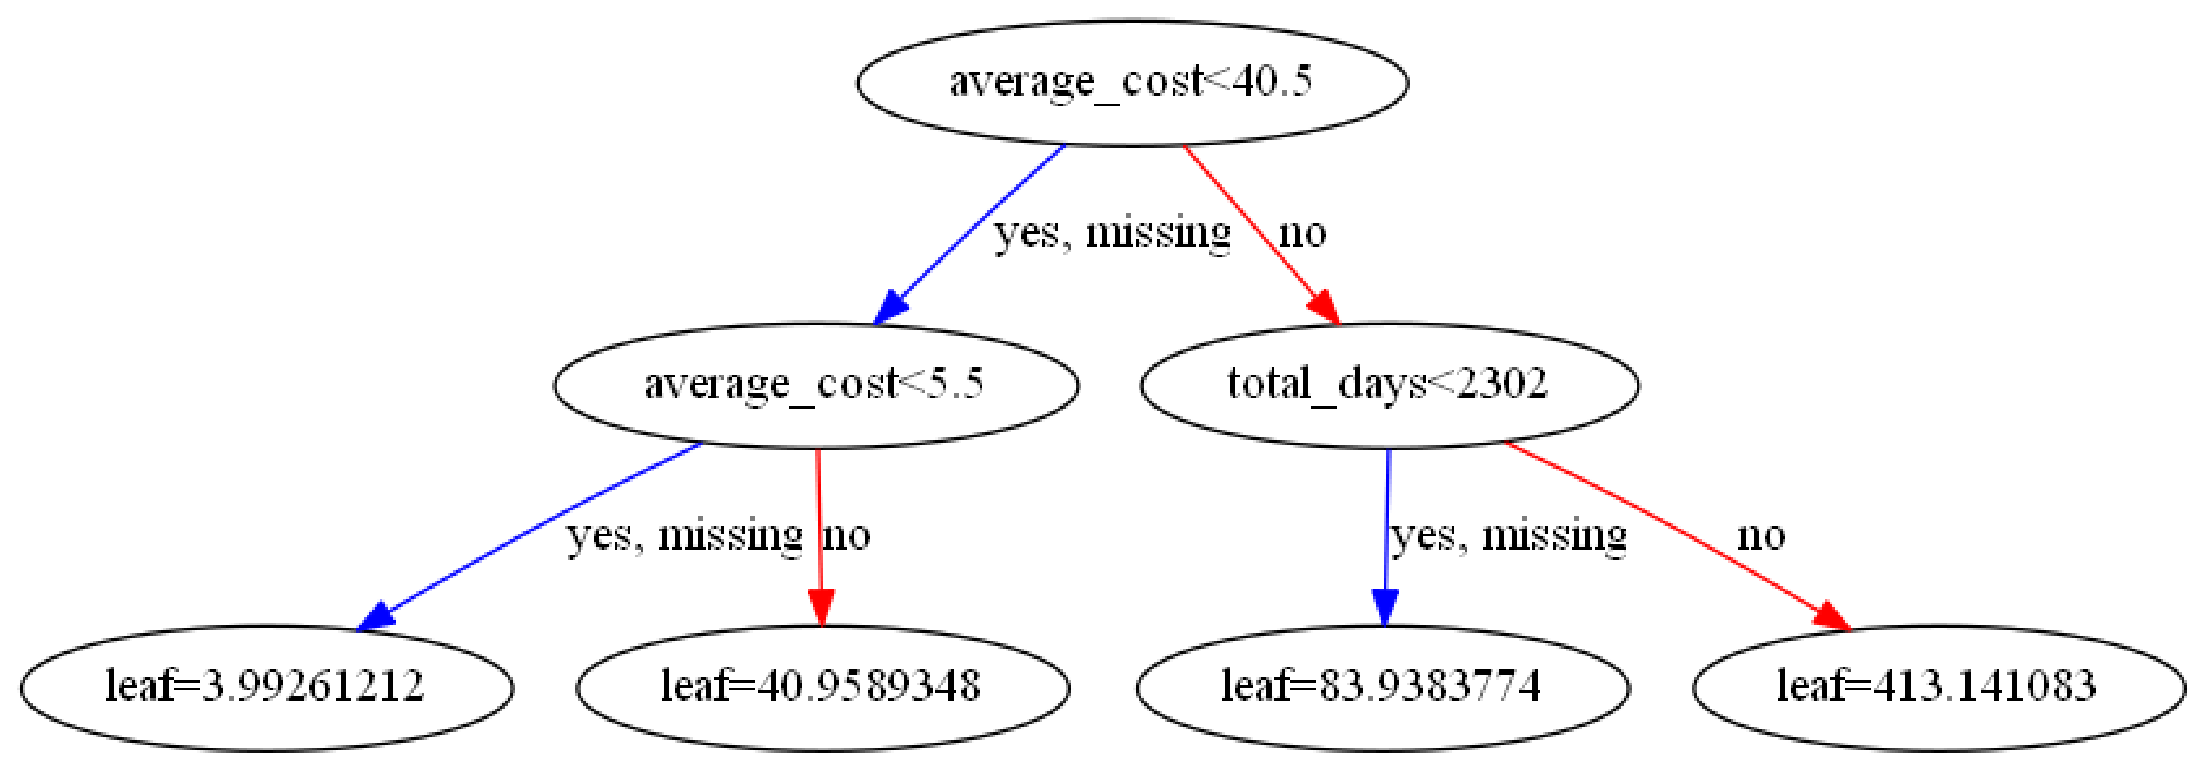

In [23]:
from xgboost import plot_tree
fig, ax = plt.subplots(figsize=(35, 35))
xgb.plot_tree(model, num_trees=2, ax=ax)
plt.show()

I created a pkl file to store the model

In [24]:
from joblib import load, dump
dump(model, 'ashrafs_model.pkl')

['ashrafs_model.pkl']

Now im loading the model and passing the independant variable i want to be predicted, NOTE: this is not test or training data

And creating a new columns with al predicted values

In [25]:
model_new = load('ashrafs_model.pkl')
task_df['y_pred']= model_new.predict(X)
task_df

,project_id,task_id,parent_task_id,parent_task_name,project_name,task_actual_cost,task_actual_duration,task_actual_fixed_cost,task_actual_overtime_cost,task_actual_overtime_work,...,task_remaining_overtime_cost,task_remaining_overtime_work,task_remaining_regular_cost,task_remaining_regular_work,task_remaining_work,task_start_date,task_work,total_days,average_cost,y_pred
0,c3ec3f4b-7254-e711-80d7-00155d38270c,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,0d88c9f1-1a02-ea11-81ff-000d3a6dccdb,Cactus Traffic Sensor,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,0,0,44200,680,1901-11-10 00:00:00,2011-09-26 00:00:00,680.0,3119.0,14.0,677.673462
1,c3ec3f4b-7254-e711-80d7-00155d38270c,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,Phase 1 - Strategic Plan,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,0,0,8320,128,1900-05-07 00:00:00,2007-07-02 00:00:00,128.0,4589.0,1.0,93.678665
2,c3ec3f4b-7254-e711-80d7-00155d38270c,1188c9f1-1a02-ea11-81ff-000d3a6dccdb,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,Assessment,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,0,0,2080,32,1900-02-01 00:00:00,2006-02-28 00:00:00,32.0,5070.0,0.0,62.680740
3,c3ec3f4b-7254-e711-80d7-00155d38270c,1288c9f1-1a02-ea11-81ff-000d3a6dccdb,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,Assessment,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,0,0,6240,96,1900-04-05 00:00:00,2003-10-31 00:00:00,96.0,5929.0,1.0,103.153214
4,c3ec3f4b-7254-e711-80d7-00155d38270c,1488c9f1-1a02-ea11-81ff-000d3a6dccdb,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,Phase 1 - Strategic Plan,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,0,0,7800,120,1900-04-29 00:00:00,2019-10-18 00:00:00,120.0,115.0,67.0,843.338135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,46173730-ee79-e711-80c7-ff2430a91da8,2ece28cd-1b02-ea11-8560-000d3af939ce,29ce28cd-1b02-ea11-8560-000d3af939ce,Integration Testing,Bradford Solid Material Laser Scanning System,0,0.0,0,0,0,...,0,0,0,0,0,2004-03-09 00:00:00,0.0,6230.0,0.0,72.155289
4985,46173730-ee79-e711-80c7-ff2430a91da8,3cce28cd-1b02-ea11-8560-000d3af939ce,38ce28cd-1b02-ea11-8560-000d3af939ce,Documentation,Bradford Solid Material Laser Scanning System,0,0.0,0,0,0,...,0,0,2080,32,32,2010-12-07 00:00:00,32.0,3748.0,0.0,55.727913
4986,46173730-ee79-e711-80c7-ff2430a91da8,44ce28cd-1b02-ea11-8560-000d3af939ce,42ce28cd-1b02-ea11-8560-000d3af939ce,Pilot,Bradford Solid Material Laser Scanning System,0,0.0,0,0,0,...,0,0,7800,120,120,2006-08-26 00:00:00,120.0,5066.0,1.0,93.678665
4987,46173730-ee79-e711-80c7-ff2430a91da8,50ce28cd-1b02-ea11-8560-000d3af939ce,49ce28cd-1b02-ea11-8560-000d3af939ce,Deployment,Bradford Solid Material Laser Scanning System,0,0.0,0,0,0,...,0,0,0,0,0,2007-08-10 00:00:00,0.0,5068.0,0.0,62.680740


I want to calculate the predicted finsh date so i first get the difference between the task work and my y_pred

In [26]:
task_df["pred_difference"] = task_df["task_work"] - task_df['y_pred']

Then i add to the start date my predicted difference to get an accurate estimate of my finish date

In [27]:
pred_finish_date = (pd.to_datetime(task_df['task_start_date'], errors='coerce') 
                    + (task_df["task_work"] - task_df["pred_difference"]).map(datetime.timedelta))
task_df["pred_finish_date"] = pred_finish_date

Creating a status column to check if the task finish date is as expected or running behind schedule

In [28]:
def GetStatus(x):
    
    if x["pred_finish_date"] < x["task_finish_date"]:
        return "Red"
    elif x["pred_finish_date"] > x["task_finish_date"]:
        return "Green"
    else:
        return "Yellow"

task_df["status"] = task_df.apply(GetStatus, axis=1)

In [29]:
task_df.head()

,project_id,task_id,parent_task_id,parent_task_name,project_name,task_actual_cost,task_actual_duration,task_actual_fixed_cost,task_actual_overtime_cost,task_actual_overtime_work,...,task_remaining_regular_work,task_remaining_work,task_start_date,task_work,total_days,average_cost,y_pred,pred_difference,pred_finish_date,status
0,c3ec3f4b-7254-e711-80d7-00155d38270c,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,0d88c9f1-1a02-ea11-81ff-000d3a6dccdb,Cactus Traffic Sensor,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,680,1901-11-10 00:00:00,2011-09-26 00:00:00,680.0,3119.0,14.0,677.673462,2.326538,2013-08-03 16:09:47.109375,Red
1,c3ec3f4b-7254-e711-80d7-00155d38270c,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,Phase 1 - Strategic Plan,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,128,1900-05-07 00:00:00,2007-07-02 00:00:00,128.0,4589.0,1.0,93.678665,34.321335,2007-10-03 16:17:16.669922,Red
2,c3ec3f4b-7254-e711-80d7-00155d38270c,1188c9f1-1a02-ea11-81ff-000d3a6dccdb,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,Assessment,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,32,1900-02-01 00:00:00,2006-02-28 00:00:00,32.0,5070.0,0.0,62.680740,-30.680740,2006-05-01 16:20:15.966797,Red
3,c3ec3f4b-7254-e711-80d7-00155d38270c,1288c9f1-1a02-ea11-81ff-000d3a6dccdb,1088c9f1-1a02-ea11-81ff-000d3a6dccdb,Assessment,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,96,1900-04-05 00:00:00,2003-10-31 00:00:00,96.0,5929.0,1.0,103.153214,-7.153214,2004-02-11 03:40:37.646484,Red
4,c3ec3f4b-7254-e711-80d7-00155d38270c,1488c9f1-1a02-ea11-81ff-000d3a6dccdb,0f88c9f1-1a02-ea11-81ff-000d3a6dccdb,Phase 1 - Strategic Plan,Cactus Traffic Sensor,1899-12-30 00:00:00,0.0,1899-12-30 00:00:00,0,1899-12-30 00:00:00,...,120,1900-04-29 00:00:00,2019-10-18 00:00:00,120.0,115.0,67.0,843.338135,-723.338135,2022-02-07 08:06:54.843750,Green


Red       4603
Yellow     209
Green      177
Name: status, dtype: int64


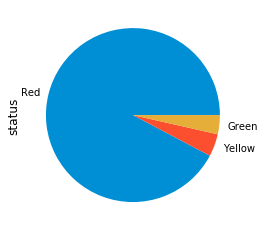

In [38]:
grouped = task_df["status"].value_counts()
grouped.plot.pie();
print(grouped)

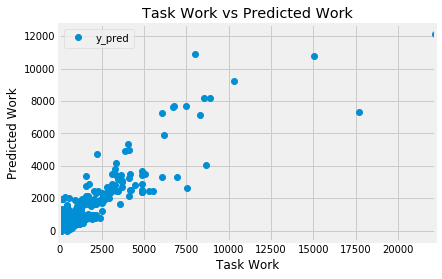

In [31]:
task_df.plot(x='task_work', y='y_pred', style='o')  
plt.title('Task Work vs Predicted Work')  
plt.xlabel('Task Work')  
plt.ylabel('Predicted Work')  
plt.show()

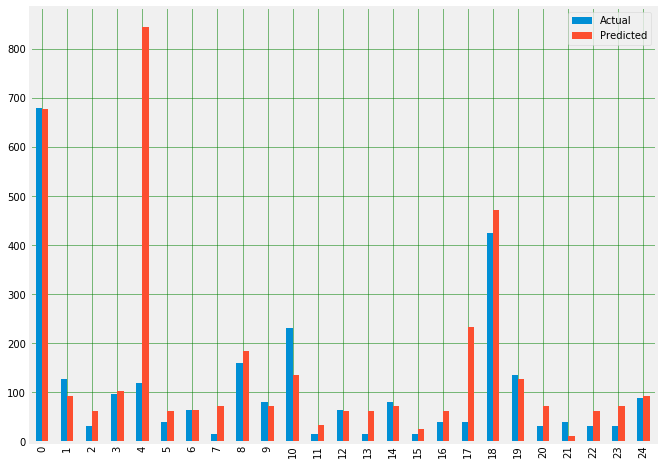

In [32]:
df = pd.DataFrame({'Actual': task_df["task_work"], 'Predicted': task_df["y_pred"]})
df1 = df.head(25)

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [33]:
export_cvs = task_df.to_csv("./data/PredictionResults.csv", index = None, header=True)

How can i improve this in the future?

Spend more time with cleaning data set to incorporate more features to test.

Automate the process by using cloud functionalities (Azure machine learning studios)

Tune the linear regression model, i have use the defult settinging and it would be interesting to see what the r2 score will be if i werer to tune it